In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [312]:
df = pd.read_csv('titanic.csv')

In [313]:
df.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [314]:
df.shape

(891, 12)

In [315]:
null = df.isnull().mean()

In [316]:
pd.DataFrame(null , columns=['Missing_Value']).sort_values(by='Missing_Value',ascending=False).style.background_gradient(cmap=r'rainbow')

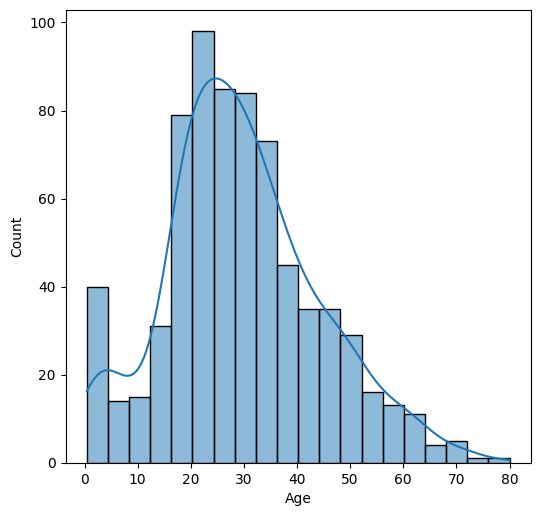

In [317]:
plt.figure(figsize=(6,6),dpi=100)
sns.histplot(df['Age'],bins=20,kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


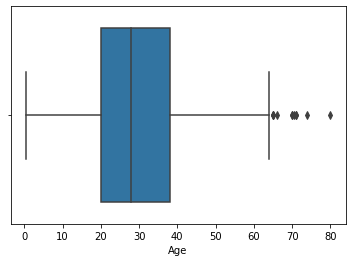

In [318]:
sns.boxplot(df['Age'],data=df)

In [319]:
df['Age'].mean()

29.69911764705882

In [320]:
df['Age'].std()

14.526497332334044

In [321]:
df['Age'].mean() + 3*df['Age'].std()

73.27860964406095

In [322]:
df['Age'].mean() - 3*df['Age'].std()

-13.88037434994331

In [323]:
df.loc[df['Age']>73,'Age']=73

The data is not normally distributed at all , for that we will use **IQR** technique.

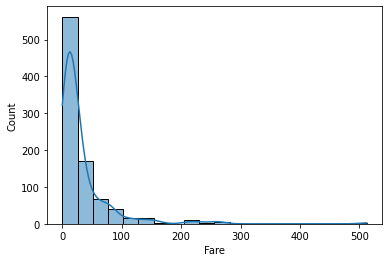

In [324]:
sns.histplot(df['Fare'],bins=20,kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


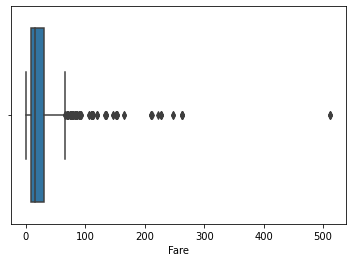

In [325]:
sns.boxplot(df['Fare'],data=df)

In [326]:
df['Fare'].describe() #first method to get the quantile

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [327]:
lower_value = df['Fare'].quantile(.25) #second method to get the quantile
upper_value = df['Fare'].quantile(.75) 
lower_value , upper_value

(7.9104, 31.0)

In [328]:
IQR = upper_value - lower_value

In [329]:
lower_lim = df['Fare'].quantile(.25) - 3*IQR
upper_lim = df['Fare'].quantile(.75) + 3*IQR ##for extreme outlier detection we can use 3*IQR
lower_lim , upper_lim

(-61.358399999999996, 100.2688)

In [330]:
df.loc[df['Fare']>110 , 'Fare'] = 110

In [331]:
df.shape

(891, 12)

In [332]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [333]:
df.head(2)

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C

[2 rows x 12 columns]

In [334]:
df.drop(['Cabin','PassengerId','Ticket'],axis=1,inplace=True)

In [335]:
df['Name'] = df['Name'].apply(lambda x : x.split(',')[1].split('.')[0])

In [336]:
df1 = df.copy()

In [337]:
df['Name'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Mlle              2
 Col               2
 Jonkheer          1
 Lady              1
 Mme               1
 the Countess      1
 Capt              1
 Don               1
 Ms                1
 Sir               1
Name: Name, dtype: int64

In [338]:
df['Name'].replace(['Master','Dr'],'others',inplace=True)

In [339]:
df = df.drop('Name' , axis=1) #### i dont know why the replace method is not working so i have dropped Name column

In [340]:
df.head(2)

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C

In [341]:
df['Sex'] = df['Sex'].replace(['male','female'],[1,0])

In [342]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [343]:
new = pd.get_dummies(df['Embarked'],drop_first=True)
df = pd.concat([df,new],axis=1)

In [344]:
df.head(2)

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  Q  S
0         0       3    1  22.0      1      0   7.2500        S  0  1
1         1       1    0  38.0      1      0  71.2833        C  0  0

In [345]:
df.drop('Embarked',axis=1,inplace=True)

In [346]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Q             0
S             0
dtype: int64

In [347]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [348]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [349]:
from sklearn.model_selection import  train_test_split

In [379]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [380]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [381]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [386]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [397]:
model = KNeighborsClassifier(n_neighbors=17)
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.8444444444444444

In [398]:
model.score(X_train,y_train)

0.8314606741573034

In [399]:
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        54
           1       0.81      0.81      0.81        36

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.84      0.84      0.84        90



In [385]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64